## 讀取圖片
* cv2.IMREAD_COLOR: 彩色
* cv2.IMREAD_GRAYSCALE: 灰階

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
path = 'dataset/cat.jpg'

In [3]:
# cv2 默認讀取格式是BGR
img = cv2.imread(path)
img.shape #維度 h, w, c

(414, 500, 3)

In [4]:
# 顯示圖片
cv2.imshow('img', img)
# 等待時間, ms, 0表示任意建終止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 定義一個顯示圖片的函數
def cv_show(img, name='image'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
img_gray = cv2.imread('dataset/cat.jpg', cv2.IMREAD_GRAYSCALE)
img_gray.shape # 變成兩維(h, w), 少了C

(414, 500)

In [7]:
cv_show(img_gray)

In [8]:
# 儲存圖片
cv2.imwrite('dataset/gray_cat.jpg', img_gray)

True

In [9]:
type(img_gray)

numpy.ndarray

In [10]:
img_gray.size

207000

In [11]:
img_gray.dtype

dtype('uint8')

## 讀取影片
* 可以直接給路徑
* cv2.VideoCapture可以用攝像頭, 用數字(0, 1)控制不同設備

In [12]:
path = 'dataset/test.mp4'

In [13]:
# 打開影片的第一針幀
vc = cv2.VideoCapture(path)
if vc.isOpened():
    vc_open, frame = vc.read() # 返回是否打開及圖片
else:
    vc_open = False
    
while vc_open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(10) & 0xFF == 27: # Esc鍵
            break
            
vc.release()
cv2.destroyAllWindows()


## 擷取部分圖片: ROI區域

In [14]:
path = 'dataset/cat.jpg'

In [15]:
img = cv2.imread(path)
cat = img[0:200, 0:200] 
cv_show(cat)

## 提取顏色通道

In [16]:
# 切分顏色通道
b, g, r = cv2.split(img)

In [17]:
print(b.shape)
print(g.shape)
print(r.shape)

(414, 500)
(414, 500)
(414, 500)


In [18]:
# 合併顏色通道
img_2 = cv2.merge((b, g, r))
img_2.shape

(414, 500, 3)

In [19]:
# 再注意!!
# 默認讀取格式是BGR (0, 1, 2)
# 只保留 R
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 1] = 0
cv_show(cur_img, 'R')

In [20]:
# 只保留 G
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 2] = 0
cv_show(cur_img, 'G')

In [21]:
# 只保留 B
cur_img = img.copy()
cur_img[:, :, 1] = 0
cur_img[:, :, 2] = 0
cv_show(cur_img, 'B')

## 邊界填充
* borderType: 填充的方法:
    - BORDER_REPLICATE: 複製法
    - BORDER_REFLECT: 反射法, 中央向兩邊複製, fedcba | abcdefgh | hgfedc
    - BORDER_REFLECT_101: 反射法, 以最邊緣為軸 gfedcb | abcdefgh | hfedcb
    - BORDER_WRAP: 外包裝法 cdefgh | abcdefgh | abcdefg
    - BORDER_CONSTANT: 常量法, 用常數進行填充

In [22]:
# 向上下左右填充
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

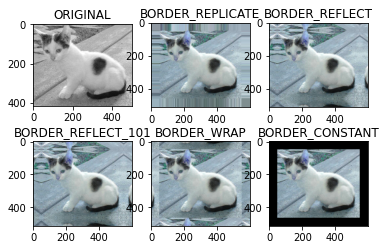

In [23]:
plt.subplot(231), plt.imshow(img_gray, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('BORDER_REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('BORDER_REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('BORDER_REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('BORDER_WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('BORDER_CONSTANT')

plt.show()

## 數值計算

In [38]:
img_cat = cv2.imread('dataset/cat.jpg')
img_dog = cv2.imread('dataset/dog.jpg')

In [39]:
img_cat_2 = img_cat + 10 # 每個像素點都+10
img_cat[:5, :, 0]

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], dtype=uint8)

In [40]:
img_cat_2[:5, :, 0]

array([[152, 156, 161, ..., 166, 165, 164],
       [118, 122, 128, ..., 165, 164, 163],
       [118, 120, 128, ..., 166, 165, 164],
       [149, 151, 158, ..., 166, 165, 164],
       [163, 166, 173, ..., 170, 169, 168]], dtype=uint8)

In [41]:
# 相當於 % 256
(img_cat + img_cat_2)[:5, :, 0]

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], dtype=uint8)

In [42]:
# > 255就取 255
cv2.add(img_cat,img_cat_2)[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [226, 230, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## 圖像融合

In [43]:
# shape 不同則不能相加
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

#### resize

In [44]:
img_cat.shape

(414, 500, 3)

In [45]:
img_dog = cv2.resize(img_dog, (500, 414)) # w, h
img_dog.shape # h, w, c

(414, 500, 3)

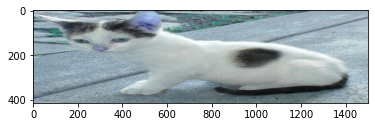

In [46]:
# resize, 用x, y的倍數
res = cv2.resize(img, (0, 0), fx=3, fy=1)
plt.imshow(res)

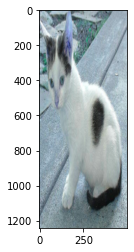

In [47]:
# resize, 用x, y的倍數
res = cv2.resize(img, (0, 0), fx=1, fy=3)
plt.imshow(res)

#### 相加的方式
$R = \alpha X{_1} + \beta X{_2} + b$

In [48]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)

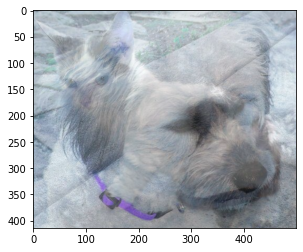

In [49]:
plt.imshow(res)